# BMD_ENG 495 Programming Assignments 

In [ ]:
# Library Import
import nibabel as nib
# import pidicom
import matplotlib.pyplot as plt
import numpy as np
import scipy

# Data Import
nib.Nifti1Header.quaternion_threshold = -1e-06
img_MRI = nib.load("/Users/takamanabe/Desktop/NU/Y1Q2/BMD_ENG495/HW1/mri_sample.nii").get_fdata()
img_CT = nib.load("/Users/takamanabe/Desktop/NU/Y1Q2/BMD_ENG495/HW1/CT_sample.nii").get_fdata()
print("" + str(img_MRI.shape))
print("" + str(img_CT.shape))

##### 1: Implement two box filters (one with 3 by 3, the other one is 5-by-5 kernel size), and apply them to sample medical images (attached to this assignment CT and MRI - two volumetric scans in nifty format) separately. Show the resulting images, and explain the resulting images, and their differences. (For convolution operation, you can use built-in function. Do not use built-in function for box filtering.)

(256, 256, 332)
(255, 178, 256)


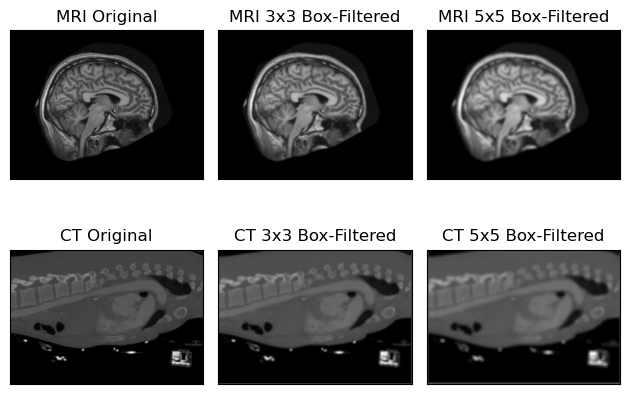

In [103]:
# Initialization
img_MRI_F1_filtered = []
img_MRI_F2_filtered = []
img_CT_F1_filtered = []
img_CT_F2_filtered = []

# Box Filters (3 by 3, 5 by 5)
def box_filter(image, size):
    filtered_all = []
    # for kk in range(image.shape[0]):
    SlicePoint = image.shape[0] // 2
    for kk in [SlicePoint]: # Only conduct for a mid-part slice due to GPU capacity
        filtered_image = np.zeros_like(image[kk,:,:]) # Filtered Image Initialization
        siderange = size//2 # length in one side (excluding the center), 3->1, 5->2
        for ii in range(siderange, image.shape[1] - siderange): # e.g., 3x3's center range is from index[1] to index[n-1], 3
            for jj in range(siderange, image.shape[2] - siderange):
                #print(image[kk,(ii - siderange):(ii + siderange + 1), (jj - siderange):(jj + siderange + 1)])
                filtered_image[ii, jj] = np.mean(image[kk,(ii - siderange):(ii + siderange + 1), (jj - siderange):(jj + siderange + 1)]) # extracting mean (1/filterlength^2)
        filtered_all.append(filtered_image)
    return np.array(filtered_all)

# # Library-used Box-Blur (Mistakely Made it)
# BoxF1 = np.ones((3,3)) * (1/9)
# BoxF2 = np.ones((5,5)) * (1/25)
# for ii in range(img_MRI.shape[0]):
#     #print(ii)
#     # Stride = 1
#     img_MRI_F1_filtered.append(scipy.signal.convolve2d(img_MRI[ii,:,:], BoxF1, mode='full', boundary='fill', fillvalue=0))
#     img_MRI_F2_filtered.append(scipy.signal.convolve2d(img_MRI[ii,:,:], BoxF2, mode='full', boundary='fill', fillvalue=0))
# for ii in range(img_CT.shape[0]): 
#     img_CT_F1_filtered.append(scipy.signal.convolve2d(img_CT[ii,:,:], BoxF1, mode='full', boundary='fill', fillvalue=0))
#     img_CT_F2_filtered.append(scipy.signal.convolve2d(img_CT[ii,:,:], BoxF2, mode='full', boundary='fill', fillvalue=0))
# img_MRI_F1_filtered=np.array(img_MRI_F1_filtered)
# img_MRI_F2_filtered=np.array(img_MRI_F2_filtered)
# img_CT_F1_filtered=np.array(img_CT_F1_filtered)
# img_CT_F2_filtered=np.array(img_CT_F2_filtered)

# 3x3
img_MRI_F1_filtered = box_filter(img_MRI,3)
img_CT_F1_filtered = box_filter(img_CT,3)
# 5x5
img_MRI_F2_filtered = box_filter(img_MRI,5)
img_CT_F2_filtered = box_filter(img_CT,5)

# List up all the data for the plots
titlename = np.array([['MRI Original', 'MRI 3x3 Box-Filtered', 'MRI 5x5 Box-Filtered'],
             ['CT Original', 'CT 3x3 Box-Filtered', 'CT 5x5 Box-Filtered']])
datalist = [img_MRI, img_MRI_F1_filtered, img_MRI_F2_filtered, img_CT, img_CT_F1_filtered, img_CT_F2_filtered]

# Create subplots
fig, axs = plt.subplots(2, 3)
listno = 0
for ii in range(2):
    for jj in range(3):
        axs[ii, jj].set_title(titlename[ii,jj])
        axs[ii, jj].imshow((datalist[listno])[(datalist[listno]).shape[0] // 2], cmap='gray')
        listno += 1

# Hide x and y ticks
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

##### 2: Implement three median filters (3 by 3, 5 by 5, and 7 by 7 kernel size), and apply these filters to images that I provided to you, separately. Show (and discuss as comments) the resulting differences for each kernel on the screen, explain where median filters are most effective. (For convolution operation, you can use built-in function. Do not use built-in function for Median filtering.)

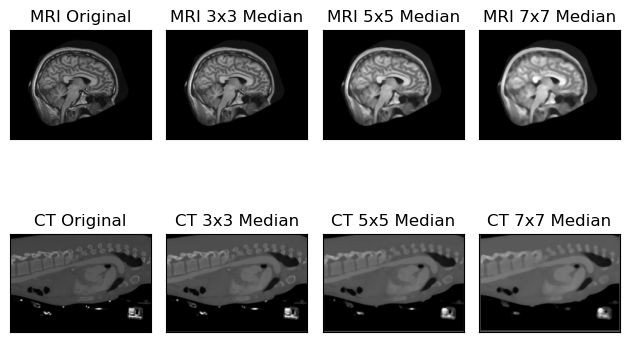

In [104]:
# Median Filters (3 by 3, 5 by 5, and 7 by 7 kernel size)
def median_filter(image, size):
    filtered_all = []
    # for kk in range(image.shape[0]):
    SlicePoint = image.shape[0] // 2
    for kk in [SlicePoint]: # Only conduct for a mid-part slice
        filtered_image = np.zeros_like(image[kk,:,:])
        siderange = size//2 # length in one side (excluding the center), 3->1, 5->2, 7->3
        # print(siderange)
        for ii in range(siderange, image.shape[1] - siderange): # e.g., 3x3's center range is from index[1] to index[n-1], 3
            for jj in range(siderange, image.shape[2] - siderange):
                #print(image[kk,(ii - siderange):(ii + siderange + 1), (jj - siderange):(jj + siderange + 1)])
                filtered_image[ii, jj] = np.median(image[kk,(ii - siderange):(ii + siderange + 1), (jj - siderange):(jj + siderange + 1)]) # extracting median
        filtered_all.append(filtered_image)
    return np.array(filtered_all)

# 3x3
img_MRI_filtered_Med3x3 = median_filter(img_MRI,3)
img_CT_filtered_Med3x3 = median_filter(img_CT,3)

# 5x5
img_MRI_filtered_Med5x5 = median_filter(img_MRI,5)
img_CT_filtered_Med5x5 = median_filter(img_CT,5)

# 7x7
img_MRI_filtered_Med7x7 = median_filter(img_MRI,7)
img_CT_filtered_Med7x7 = median_filter(img_CT,7)

# List up all the data for the plots
titlename = np.array([['MRI Original', 'MRI 3x3 Median', 'MRI 5x5 Median','MRI 7x7 Median'],
                      ['CT Original', 'CT 3x3 Median', 'CT 5x5 Median', 'CT 7x7 Median']])
datalist = [img_MRI, img_MRI_filtered_Med3x3, img_MRI_filtered_Med5x5, img_MRI_filtered_Med7x7, 
            img_CT, img_CT_filtered_Med3x3, img_CT_filtered_Med5x5, img_CT_filtered_Med7x7]
    
# Create subplots
fig, axs = plt.subplots(2, 4)
listno = 0
for ii in range(2):
    for jj in range(4):
        axs[ii, jj].set_title(titlename[ii,jj])
        axs[ii, jj].imshow((datalist[listno])[(datalist[listno]).shape[0] // 2], cmap='gray')
        listno += 1

# Hide x and y ticks
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

##### 3: Implement histogram function from scratch, and show the resulting bar-graph (histogram). Use 256, 128, and 64 bins to visualize histograms. Comment on the resulting differences with respect to bins. Use previously provided images to conduct this experiment. (Do not use built-in histogram function, create it yourself.)

(256, 128)








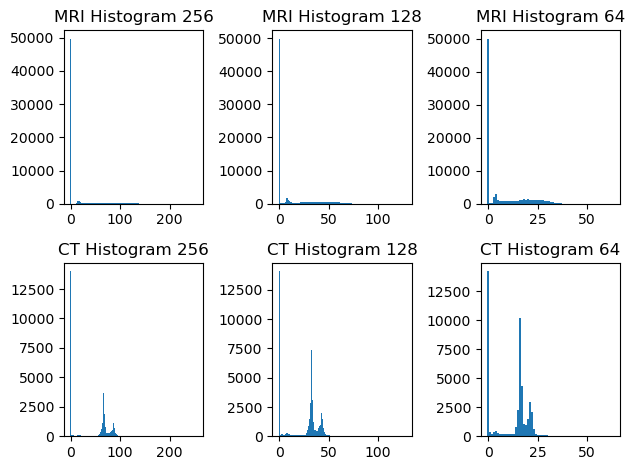

In [110]:
# Histogram Function
def MyHistgram(image, num_bins):
    hist = np.zeros((image.shape[0], num_bins)) # zeros for the number of bins
    nn = 0
    picindex = np.zeros(image.shape)

    # For Each Slices! 
    for kk in range(image.shape[0]):
        #print(str(kk) + " out of " + str(image.shape[0]))
        #print("-----------------------------------------------")

        # Blightness can be -1024!?
        min_val = np.min(image[kk,:,:]) # Maximum Blightness
        max_val = np.max(image[kk,:,:]) # Minimum Blightness

        # Range
        Trange = max_val - min_val + 1
        HistoWidth = Trange / num_bins

        # Target Slice
        pixel_vals = image[kk,:,:]

        # Distribute each pixel to histogram
        for pixel_ii in range(pixel_vals.shape[0]): # For all pixels
            for pixel_jj in range(pixel_vals.shape[1]):
                bin_index = int((pixel_vals[pixel_ii, pixel_jj]-min_val) / HistoWidth)
                hist[kk, bin_index] += 1

                # picindex stored for q4
                picindex[kk, pixel_ii, pixel_jj] = bin_index

    return hist, picindex

img_MRI_histo_256, _ = MyHistgram(img_MRI, 256)
img_MRI_histo_128, _ = MyHistgram(img_MRI, 128)
img_MRI_histo_64, _ = MyHistgram(img_MRI, 64)

img_CT_histo_256, _ = MyHistgram(img_CT, 256)
img_CT_histo_128, _ = MyHistgram(img_CT, 128)
img_CT_histo_64, _ = MyHistgram(img_CT, 64)

titlename = np.array([['MRI Histogram 256', 'MRI Histogram 128', 'MRI Histogram 64'],
                      ['CT Histogram 256', 'CT Histogram 128', 'CT Histogram 64']])
datalist = [img_MRI_histo_256, img_MRI_histo_128, img_MRI_histo_64,
            img_CT_histo_256, img_CT_histo_128, img_CT_histo_64]

print(datalist[1].shape)
fig, axs = plt.subplots(2, 3)
listno = 0
for ii in range(2):
    for jj in range(3):
        axs[ii, jj].set_title(titlename[ii, jj])
        # print(np.arange(datalist[listno].shape[1]))
        # print((datalist[listno]).shape)
        axs[ii, jj].bar(np.arange(datalist[listno].shape[1]), (datalist[listno])[datalist[listno].shape[0] // 2,:], width=1)
        # axs[ii, jj].set_aspect('auto', adjustable='datalim')
        # axs[ii, jj].set_aspect(3)
        # axs[ii, jj].set_yscale('log')
        listno += 1

# Hide x and y ticks
for ax in axs.flat:
    print()
    # ax.set_xticks([])
    # ax.set_yticks([])

plt.tight_layout()
plt.show()

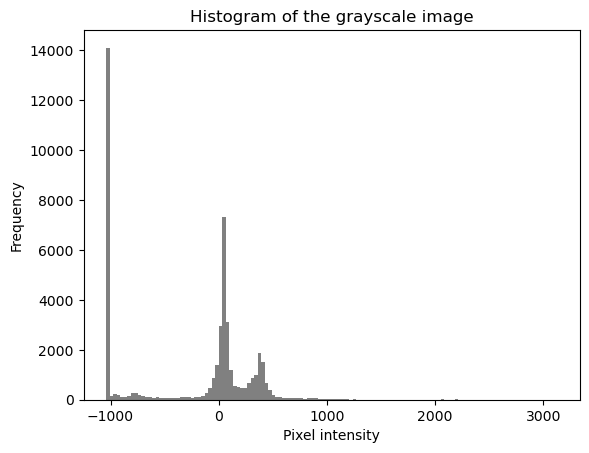

In [111]:
# Checker using library
def plot_histogram(image, bin_num, range_min, range_max):
    histogram, bins = np.histogram(image.flatten(), bins=bin_num, range=[range_min, range_max])
    plt.bar(bins[:-1], histogram, width=np.diff(bins), color='gray')
    plt.title("Histogram of the grayscale image")
    plt.xlabel("Pixel intensity")
    plt.ylabel("Frequency")
    plt.show()

# ここに2次元グレースケール画像のnp.arrayを入力してください
# 例: image = np.array([[0, 10, 20], [30, 40, 50], [60, 70, 80]])
image = img_CT[img_CT.shape[0]//2,:,:]

# ヒストグラムのビンの数
bin_num = 128

# 画像のピクセル値の範囲
range_min = np.min(image)
range_max = np.max(image)

# ヒストグラムのプロット
plot_histogram(image, bin_num, range_min, range_max)

#### 4: 

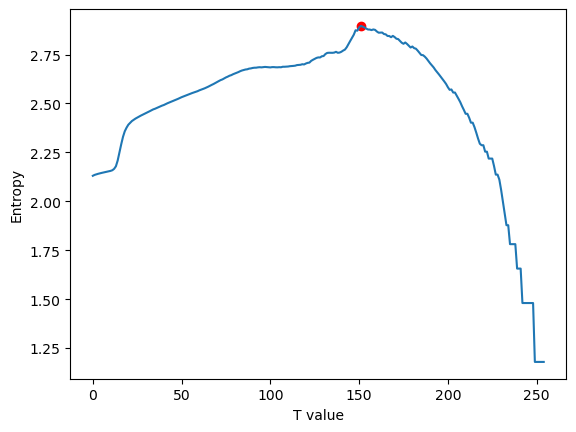

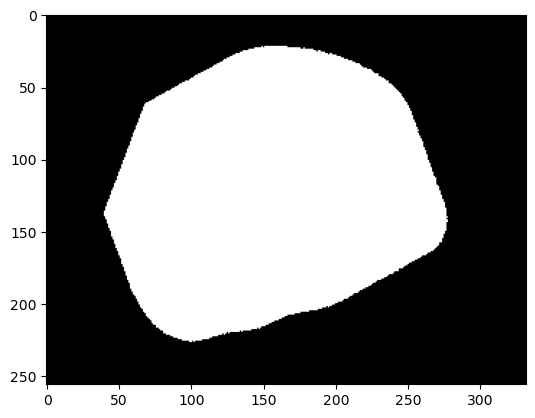

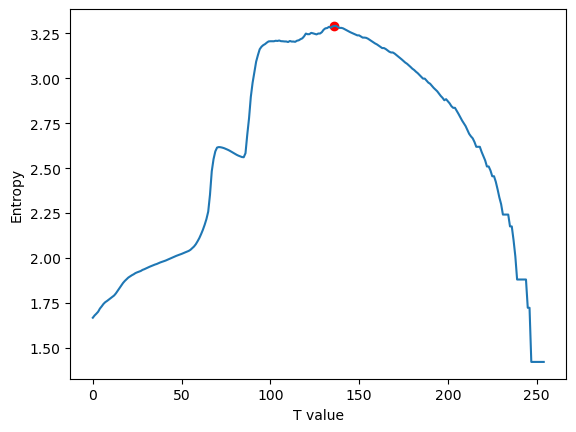

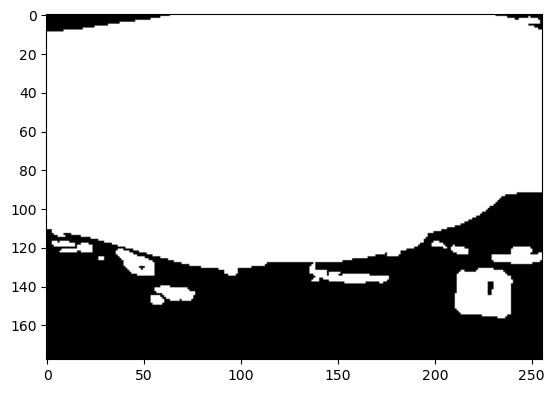

In [116]:
# For each possible T ∈ 0,...,L−1, compute summation of entropy A and entropy B, called total entropy = H(A)+ H(B). 
# Note: A: Background, B: foreground of the image.
# Entropy Equation: Σ p_i * log(p_i)

HistoList = []

def MaxEntropy(image, num_bins):


    img_histo, picindex = MyHistgram(image, num_bins) # Return 1. img_histo(SliceNum x HistogramBins), 2. BinsIndex in image shape

    # Initialization
    H_total = -float('inf') # Find "maximum" entropy; starts from least number
    SlicePoint = image.shape[0] // 2
    L = num_bins # Number of bins (histogram)
    H_total_history = [] # History

    # T moving along 0 to L
    for T in range(L-1):
        # print("0-" + str(T) + ":A, " + str(T) + "-" + str(L-1) + ":B", end="")

        # p_i array (p_i = n_i / N)
        img_PDF_ALL = img_histo[SlicePoint,:] / np.sum(img_histo[SlicePoint,:]) 

        # P_T = Σ_[i=0, T] p_i
        P_T = np.sum(img_PDF_ALL[0:T+1]) 
        # print(P_T)

        # Partial PDF A and B
        img_PDF_A = img_PDF_ALL[0:T+1] / P_T
        img_PDF_B = img_PDF_ALL[T+1:L] / (1-P_T)  # n_B_i / N_B
        # print(img_PDF_B)

        # Eliminating 0 values because log 0 is uncalculatable
        img_PDF_A = img_PDF_A[img_PDF_A != 0] # Removing 0 value
        img_PDF_B = img_PDF_B[img_PDF_B != 0] # Removing 0 value
        
        # Entropy Calculation
        H_A = np.sum([img_PDF_A[ii] * np.log10(img_PDF_A[ii]) for ii in range(img_PDF_A.shape[0])])  # 0, 1, ..., T
        H_B = np.sum([img_PDF_B[ii] * np.log10(img_PDF_B[ii]) for ii in range(img_PDF_B.shape[0])])  # T+1, T+2, ..., L-1
        H_total_temp = abs(H_A + H_B) # Need to be positive!!!!

        # Renew the T value if bigger than the current record
        #print(" --- " + str(H_total_temp), end="")
        H_total_history.append(H_total_temp) # Store in all
        if H_total_temp > H_total:
            #print(" - Renewed! From " + str(H_total))
            H_total = H_total_temp # Renew
            T_index = T # Renew
        # else:
            #print(" - Unchanged!")
            

    # Plot the T value 
    plt.figure()
    plt.plot(np.arange(np.array(H_total_history).shape[0]), np.array(H_total_history))
    plt.scatter(T_index, H_total, color='red', label='Max')  # Maximum Value
    plt.xlabel("T value")
    plt.ylabel("Entropy")
    plt.show()

    # Plot Binary Depict
    picindex = picindex[SlicePoint,:,:] # at the certain slice
    picbinary = (picindex >= 1).astype(int)
    # print(np.mean(picbinary))

    plt.figure()
    plt.imshow(picbinary, cmap='gray')
    
    return H_total, T_index, picindex

_, T_opted_MRI, picindex_MRI = MaxEntropy(img_MRI, 256)
_, T_opted_CT, picindex_CT = MaxEntropy(img_CT, 256)



#### 5: CNN Implementation

##### main.py

In [123]:
import argparse
import time
import torch
from torch import optim as optim
from torch.nn import functional as F
from torchvision import datasets, transforms
import CNN

#code to train the model for given epoch
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        #Zero the gradient buffers of all parameters
        optimizer.zero_grad()

        #feed data to model to get output
        output = model(data)

        # computing loss using loss function given below
        loss = F.nll_loss(output, target)

        # back propagate the loss to compute gradients
        loss.backward()

        #update weights using optimizer
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))

#code to evaluate the model
def test(args, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)

            # feed data to model to get output
            output = model(data)

            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss

            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability

            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    accuracy = 100. * correct / len(test_loader.dataset)

    return accuracy


def train_and_test(args, device, model, test_loader, train_loader, CRITERIA):  # CRITERIA WAS ADDED BY ME!
    # ======for STEP 4 in PA1, use L2 regularization for only fully connected layers.======#
    #
    # ******HINT*******: use weight_decay parameter when defining optimizer. may use an if statement to check if args.weight_decay is not zero, then use per parameter decay.
    # ***************** See https://pytorch.org/docs/stable/optim.html for per parameter options
    # remove following two lines for NotImplementedError after implementation of all models
    if len(list(model.parameters())) == 0:
        return NotImplementedError
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum, weight_decay=args.weight_decay)

    for epoch in range(1, args.epochs + 1):
        # in your training loop:
        start_time = time.time()

        # summary(Net(mode, args), (1, 28, 28))

        train(args, model, device, train_loader, optimizer, epoch)

        end_time = time.time()
        print('the training took: %d(s)' % (end_time - start_time))

        accuracy = test(args, model, device, test_loader) # CRITERIA was added by Me!

        # Added by Me!! If satisfied accuracy criteria: break and stop training.
        if accuracy >= CRITERIA:
            print("ACC (" + str(accuracy) + ") satisfied the criteria! (>=" + str(CRITERIA) + ")")
            # break
        else:
            print("ACC (" + str(accuracy) + ") NOT satisfied the criteria... (<" + str(CRITERIA) + ")")

    if (args.save_model):
        torch.save(model.state_dict(), "mnist_cnn.pt")

    return accuracy


def main():
    # Training settings
    nn = int(input("Model No: "))
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--mode', type=int, default=nn, metavar='N', #############################################################
                        help='mode to define which model to be used.')
    parser.add_argument('--batch-size', type=int, default=10, metavar='N', # BatchSize
                        help='input batch size for training (default: 64)')
    parser.add_argument('--hidden-size', type=int, default=100, metavar='N', # Hidden layer 100 neurons (only used for model 1)
                        help='hidden layer size for network (default: 100)')
    parser.add_argument('--weight-decay', type=int, default=0, metavar='N',
                        help='Weight decay, used for L2 regularization (default: 0)') # Regularization
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)') # test BatchSize
    parser.add_argument('--epochs', type=int, default=60, metavar='N',
                        help='number of epochs to train (default: 10)') # Training Epochs
    parser.add_argument('--lr', type=float, default=0.1, metavar='LR',
                        help='learning rate (default: 0.01)')           # Learning Rate
    parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
                        help='SGD momentum (default: 0.5)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=10, metavar='N',
                        help='how many batches to wait before logging training status')

    parser.add_argument('--save-model', action='store_true', default=False,
                        help='For Saving the current Model')
    args = parser.parse_args(args=[])

    #print("Hyperparameters:")
    #print(" --- Batch Size: " + str())


    #check if we can use GPU for training.
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(args.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    #may increase number of workers to speed up the dataloading.
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

    # ======================================================================
    #  STEP 0: Load data from the MNIST database.
    #  This loads our training and test data from the MNIST database files available in torchvision package.
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(), #scale pixel values between 0 and 1
                           transforms.Normalize((0.1307,), (0.3081,)) #normalize using mean and standard deviation
                       ])),
        batch_size=args.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
            transforms.ToTensor(), #scale pixel values between 0 and 1
            transforms.Normalize((0.1307,), (0.3081,)) #normalize using mean and standard deviation
        ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

    # ======================================================================
    #  STEP 1: Train a baseline model.
    #  This trains a feed forward neural network with one hidden layer.
    #  Expected accuracy >= 97.80%
    if args.mode == 1:
        model = Net(1, args).to(device)

        accuracy = train_and_test(args, device, model, test_loader, train_loader, 97.80) # last: CRITERIA

        # Output accuracy.
        print(20 * '*' + 'model 1' + 20 * '*')
        print('FINAL accuracy is %f' % (accuracy))
        print()

    # ======================================================================
    #  STEP 2: Use two convolutional layers.
    #  Expected accuracy >= 99.06%

    if args.mode == 2:
        model = Net(2, args).to(device)

        accuracy = train_and_test(args, device, model, test_loader, train_loader, 99.06) # last: CRITERIA

        # Output accuracy.
        print(20 * '*' + 'model 2' + 20 * '*')
        print('FINAL accuracy is %f' % (accuracy))
        print()

    # ======================================================================
    #  STEP 3: Replace sigmoid activation with ReLU.
    #
    #  Expected accuracy>= 99.23%

    if args.mode == 3:
        args.batch_size = 32 # No indicated (self)
        args.learning_rate = 0.03 
        model = Net(3, args).to(device)

        accuracy = train_and_test(args, device, model, test_loader, train_loader, 99.23) # last: CRITERIA

        # Output accuracy.
        print(20 * '*' + 'model 3' + 20 * '*')
        print('FINAL accuracy is %f' % (accuracy))
        print()

    # ======================================================================
    #  STEP 4: Add one more fully connected layer.
    #
    #  Expected accuracy>= 99.37%

    if args.mode == 4:
        args.learning_rate = 0.03
        args.weight_decay = 1e-5
        model = Net(4, args).to(device)

        accuracy = train_and_test(args, device, model, test_loader, train_loader, 99.37) # last: CRITERIA

        # Output accuracy.
        print(20 * '*' + 'model 4' + 20 * '*')
        print('FINAL accuracy is %f' % (accuracy))
        print()

    # ======================================================================
    #  STEP 5: Add dropout to reduce overfitting.
    #
    #  Expected accuracy: 99.40%

    if args.mode == 5:
        args.learning_rate = 0.03
        args.num_epochs = 40
        args.hiddenSize = 1000

        model = Net(4, args).to(device)

        accuracy = train_and_test(args, device, model, test_loader, train_loader, 99.40) # last: CRITERIA

        # Output accuracy.
        print(20 * '*' + 'model 5' + 20 * '*')
        print('FINAL accuracy is %f' % (accuracy))
        print()

if __name__ == '__main__':
    main()


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.270705
Train Epoch: 1 [100/60000 (0%)]	Loss: 2.318462
Train Epoch: 1 [200/60000 (0%)]	Loss: 2.135335
Train Epoch: 1 [300/60000 (0%)]	Loss: 1.398620
Train Epoch: 1 [400/60000 (1%)]	Loss: 1.348513
Train Epoch: 1 [500/60000 (1%)]	Loss: 1.080949
Train Epoch: 1 [600/60000 (1%)]	Loss: 0.474218
Train Epoch: 1 [700/60000 (1%)]	Loss: 1.128235
Train Epoch: 1 [800/60000 (1%)]	Loss: 0.743692
Train Epoch: 1 [900/60000 (2%)]	Loss: 0.567757
Train Epoch: 1 [1000/60000 (2%)]	Loss: 0.535998
Train Epoch: 1 [1100/60000 (2%)]	Loss: 1.251676
Train Epoch: 1 [1200/60000 (2%)]	Loss: 0.679983
Train Epoch: 1 [1300/60000 (2%)]	Loss: 0.304722
Train Epoch: 1 [1400/60000 (2%)]	Loss: 0.225326
Train Epoch: 1 [1500/60000 (2%)]	Loss: 0.506634
Train Epoch: 1 [1600/60000 (3%)]	Loss: 0.330423
Train Epoch: 1 [1700/60000 (3%)]	Loss: 0.111419
Train Epoch: 1 [1800/60000 (3%)]	Loss: 0.128220
Train Epoch: 1 [1900/60000 (3%)]	Loss: 0.373941
Train Epoch: 1 [2000/60000 (3%)]	Loss: 0.046103
Trai